# Unsupervised learning

### AutoEncoders  

An autoencoder, is an artificial neural network used for learning efficient codings. 

The aim of an autoencoder is to learn a representation (encoding) for a set of data, typically for the purpose of dimensionality reduction. 

<img src ="imgs/autoencoder.png" width="25%">

Unsupervised learning is a type of machine learning algorithm used to draw inferences from datasets consisting of input data without labeled responses. The most common unsupervised learning method is cluster analysis, which is used for exploratory data analysis to find hidden patterns or grouping in data.

In [1]:
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
# this code loads a local version of mnist dataset 
import pickle
import gzip
import sys

def load_mnist_local(path):
    if path.endswith(".gz"):
        f = gzip.open(path, 'rb')
    else:
        f = open(path, 'rb')

    if sys.version_info < (3,):
        data = pickle.load(f)
    else:
        data = pickle.load(f, encoding="bytes")

    f.close()
    return data

path_to_dataset = "data/mnist.pkl.gz"
(X_train, y_train), (X_test, y_test) = load_mnist_local(path_to_dataset)

# squeeze values in [0,1]
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
# flatten images
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [3]:
# based on: https://blog.keras.io/building-autoencoders-in-keras.html
# This code uses the functional API of Keras

encoding_dim = 32  # 32 units
input_img = Input(shape=(784,)) # 784 = 28 x 28 -> vectors of the image
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input=input_img, output=decoded)
encoder = Model(input=input_img, output=encoded)

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

early_stop = EarlyStopping(monitor='val_loss', patience=3)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')



#note: X_train, X_train :) 
autoencoder.fit(X_train, X_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test),
               validation_split=0.15,
               callbacks=[early_stop])

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if __name__ == '__main__':
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  del sys.path[0]


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s - loss: 0.3784 - val_loss: 0.2722
Epoch 2/10
60000/60000 [==============================] - 8s - loss: 0.2643 - val_loss: 0.2530
Epoch 3/10
60000/60000 [==============================] - 8s - loss: 0.2425 - val_loss: 0.2295
Epoch 4/10
60000/60000 [==============================] - 9s - loss: 0.2217 - val_loss: 0.2117
Epoch 5/10
60000/60000 [==============================] - 10s - loss: 0.2070 - val_loss: 0.1997
Epoch 6/10
60000/60000 [==============================] - 9s - loss: 0.1966 - val_loss: 0.1906
Epoch 7/10
60000/60000 [==============================] - 11s - loss: 0.1885 - val_loss: 0.1833
Epoch 8/10
60000/60000 [==============================] - 11s - loss: 0.1817 - val_loss: 0.1770
Epoch 9/10
60000/60000 [==============================] - 10s - loss: 0.1757 - val_loss: 0.1714
Epoch 10/10
60000/60000 [==============================] - 9s - loss: 0.1705 - val_loss: 0.

In [6]:
autoencoder.fit??

In [7]:
early_stop = EarlyStopping

#### Testing the Autoencoder 

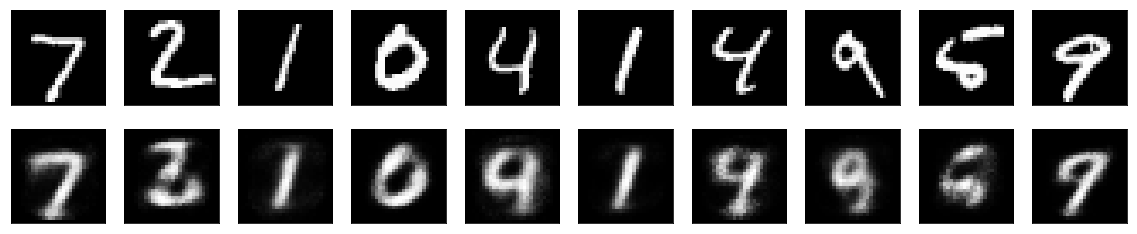

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### Sample generation with Autoencoder 

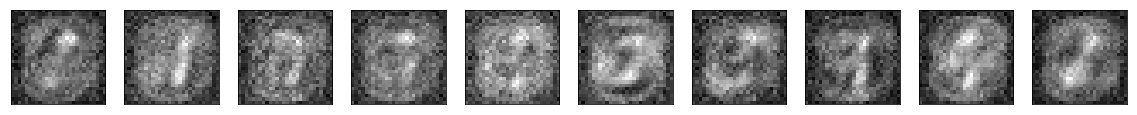

In [9]:
encoded_imgs = np.random.rand(10,32)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # generation
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### Pretraining encoders 

One of the powerful tools of auto-encoders is using the encoder to generate meaningful representation from the feature vectors.

In [ ]:
# Use the encoder to pretrain a classifier 

---

# Natural Language Processing using Artificial Neural Networks

> “In God we trust. All others must bring data.” – W. Edwards Deming, statistician

# Word Embeddings

### What?
Convert words to vectors in a high dimensional space. Each dimension denotes an aspect like gender, type of object / word.

"Word embeddings" are a family of natural language processing techniques aiming at mapping semantic meaning into a geometric space. This is done by associating a numeric vector to every word in a dictionary, such that the distance (e.g. L2 distance or more commonly cosine distance) between any two vectors would capture part of the semantic relationship between the two associated words. The geometric space formed by these vectors is called an embedding space.



### Why?
By converting words to vectors we build relations between words. More similar the words in a dimension, more closer their scores are.

In fact its the Word2Vec in slide 83.

### Example
_W(green) = (1.2, 0.98, 0.05, ...)_

_W(red) = (1.1, 0.2, 0.5, ...)_

Here the vector values of _green_ and _red_ are very similar in one dimension because they both are colours. The value for second dimension is very different because red might be depicting something negative in the training data while green is used for positiveness.

By vectorizing we are indirectly building different kind of relations between words (see slide 84).

## Example of `word2vec` using gensim

In [35]:
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec

### Reading blog post from data directory

In [36]:
import os
import pickle

In [37]:
DATA_DIRECTORY = os.path.join(os.path.abspath(os.path.curdir), 'data')

In [38]:
male_posts = []  # empty lists
female_post = [] # empty lists

In [39]:
with open(os.path.join(DATA_DIRECTORY,"male_blog_list.txt"),"rb") as male_file:
    male_posts= pickle.load(male_file)
    
with open(os.path.join(DATA_DIRECTORY,"female_blog_list.txt"),"rb") as female_file:
    female_posts = pickle.load(female_file)

In [40]:
print(len(female_posts))
print(len(male_posts)) # number of documents

2252
2611


In [41]:
filtered_male_posts = list(filter(lambda p: len(p) > 0, male_posts)) # filters documents bigger than 0
filtered_female_posts = list(filter(lambda p: len(p) > 0, female_posts))
posts = filtered_female_posts + filtered_male_posts 

In [42]:
print(len(filtered_female_posts), len(filtered_male_posts), len(posts)) # Length of posts

2247 2595 4842


## Word2Vec

In [53]:
w2v = Word2Vec(size=200, min_count=1)
# Size of the hidden layer -> each word is represented with a 200 dimensional vector
# min_count = 1 is how often a number occures in a document

# Builts the vector for each word
w2v.build_vocab(map(lambda x: x.split(), posts[:100]), )

In [54]:
w2v.wv.vocab

{'Well,': <gensim.models.keyedvectors.Vocab at 0x128147a58>,
 'everyone': <gensim.models.keyedvectors.Vocab at 0x1281470f0>,
 'got': <gensim.models.keyedvectors.Vocab at 0x128147128>,
 'up': <gensim.models.keyedvectors.Vocab at 0x1281442e8>,
 'and': <gensim.models.keyedvectors.Vocab at 0x1281444a8>,
 'going': <gensim.models.keyedvectors.Vocab at 0x128144550>,
 'this': <gensim.models.keyedvectors.Vocab at 0x1281446d8>,
 'morning.': <gensim.models.keyedvectors.Vocab at 0x128144748>,
 "It's": <gensim.models.keyedvectors.Vocab at 0x1281447b8>,
 'still': <gensim.models.keyedvectors.Vocab at 0x1281448d0>,
 'raining,': <gensim.models.keyedvectors.Vocab at 0x128144c88>,
 'but': <gensim.models.keyedvectors.Vocab at 0x128144f60>,
 "that's": <gensim.models.keyedvectors.Vocab at 0x128157390>,
 'okay': <gensim.models.keyedvectors.Vocab at 0x128157080>,
 'with': <gensim.models.keyedvectors.Vocab at 0x1281395f8>,
 'me.': <gensim.models.keyedvectors.Vocab at 0x128139cf8>,
 'Sort': <gensim.models.keyed

In [64]:
w2v.similarity('men', 'women')

-0.061242011755893118

In [65]:
w2v.similarity('I', 'My')

0.047454337510939693

In [66]:
print(posts[5])
w2v.similarity('ring', 'husband')

I've tried starting blog after blog and it just never feels right.  Then I read today that it feels strange to most people, but the more you do it the better it gets (hmm, sounds suspiciously like something else!) so I decided to give it another try.    My husband bought me a notepad at  urlLink McNally  (the best bookstore in Western Canada) with that title and a picture of a 50s housewife grinning desperately.  Each page has something funny like "New curtains!  Hurrah!".  For some reason it struck me as absolutely hilarious and has stuck in my head ever since.  What were those women thinking?


0.00072671035336174805

In [67]:
w2v.similarity('ring', 'housewife')

0.064877960844881302

In [68]:
w2v.similarity('women', 'housewife')  # Diversity friendly

-0.053023173807764903

## Doc2Vec

The same technique of word2vec is extrapolated to documents. Here, we do everything done in word2vec + we vectorize the documents too

In [69]:
import numpy as np

In [72]:
# 0 for male, 1 for female
y_posts = np.concatenate((np.zeros(len(filtered_male_posts)),
                          np.ones(len(filtered_female_posts))))

In [71]:
len(y_posts)

4842

# Convolutional Neural Networks for Sentence Classification

Train convolutional network for sentiment analysis. Based on
"Convolutional Neural Networks for Sentence Classification" by Yoon Kim
http://arxiv.org/pdf/1408.5882v2.pdf

For 'CNN-non-static' gets to 82.1% after 61 epochs with following settings:
embedding_dim = 20          
filter_sizes = (3, 4)
num_filters = 3
dropout_prob = (0.7, 0.8)
hidden_dims = 100

For 'CNN-rand' gets to 78-79% after 7-8 epochs with following settings:
embedding_dim = 20          
filter_sizes = (3, 4)
num_filters = 150
dropout_prob = (0.25, 0.5)
hidden_dims = 150

For 'CNN-static' gets to 75.4% after 7 epochs with following settings:
embedding_dim = 100          
filter_sizes = (3, 4)
num_filters = 150
dropout_prob = (0.25, 0.5)
hidden_dims = 150

* it turns out that such a small data set as "Movie reviews with one
sentence per review"  (Pang and Lee, 2005) requires much smaller network
than the one introduced in the original article:
- embedding dimension is only 20 (instead of 300; 'CNN-static' still requires ~100)
- 2 filter sizes (instead of 3)
- higher dropout probabilities and
- 3 filters per filter size is enough for 'CNN-non-static' (instead of 100)
- embedding initialization does not require prebuilt Google Word2Vec data.
Training Word2Vec on the same "Movie reviews" data set is enough to 
achieve performance reported in the article (81.6%)

** Another distinct difference is slidind MaxPooling window of length=2
instead of MaxPooling over whole feature map as in the article

In [ ]:
import numpy as np
import data_helpers
from w2v import train_word2vec

from keras.models import Sequential, Model
from keras.layers import (Activation, Dense, Dropout, Embedding, 
                          Flatten, Input, Merge, 
                          Convolution1D, MaxPooling1D)

np.random.seed(2)

### Parameters

Model Variations. See Kim Yoon's Convolutional Neural Networks for 
Sentence Classification, Section 3 for detail.

In [ ]:
model_variation = 'CNN-rand'  #  CNN-rand | CNN-non-static | CNN-static
print('Model variation is %s' % model_variation)

In [ ]:
# Model Hyperparameters
sequence_length = 56
embedding_dim = 20          
filter_sizes = (3, 4)
num_filters = 150
dropout_prob = (0.25, 0.5)
hidden_dims = 150

In [ ]:
# Training parameters
batch_size = 32
num_epochs = 100
val_split = 0.1

In [ ]:
# Word2Vec parameters, see train_word2vec
min_word_count = 1  # Minimum word count                        
context = 10        # Context window size    

### Data Preparation 

In [ ]:
# Load data
print("Loading data...")
x, y, vocabulary, vocabulary_inv = data_helpers.load_data()

if model_variation=='CNN-non-static' or model_variation=='CNN-static':
    embedding_weights = train_word2vec(x, vocabulary_inv, 
                                       embedding_dim, min_word_count, 
                                       context)
    if model_variation=='CNN-static':
        x = embedding_weights[0][x]
elif model_variation=='CNN-rand':
    embedding_weights = None
else:
    raise ValueError('Unknown model variation')    

In [ ]:
# Shuffle data
shuffle_indices = np.random.permutation(np.arange(len(y)))
x_shuffled = x[shuffle_indices]
y_shuffled = y[shuffle_indices].argmax(axis=1)

In [ ]:
print("Vocabulary Size: {:d}".format(len(vocabulary)))

### Building CNN Model

In [ ]:
graph_in = Input(shape=(sequence_length, embedding_dim))
convs = []
for fsz in filter_sizes:
    conv = Convolution1D(nb_filter=num_filters,
                         filter_length=fsz,
                         border_mode='valid',
                         activation='relu',
                         subsample_length=1)(graph_in)
    pool = MaxPooling1D(pool_length=2)(conv)
    flatten = Flatten()(pool)
    convs.append(flatten)
    
if len(filter_sizes)>1:
    out = Merge(mode='concat')(convs)
else:
    out = convs[0]

graph = Model(input=graph_in, output=out)

# main sequential model
model = Sequential()
if not model_variation=='CNN-static':
    model.add(Embedding(len(vocabulary), embedding_dim, input_length=sequence_length,
                        weights=embedding_weights))
model.add(Dropout(dropout_prob[0], input_shape=(sequence_length, embedding_dim)))
model.add(graph)
model.add(Dense(hidden_dims))
model.add(Dropout(dropout_prob[1]))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

# Training model
# ==================================================
model.fit(x_shuffled, y_shuffled, batch_size=batch_size,
          nb_epoch=num_epochs, validation_split=val_split, verbose=2)

# Another Example

Using Keras + [**GloVe**](http://nlp.stanford.edu/projects/glove/) - **Global Vectors for Word Representation**

## Using pre-trained word embeddings in a Keras model

**Reference:** [https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html]()